## Problem
To monitor the status of ambient air quality. The Central Pollution Control Board (CPCB), India operates a vast network of monitoring stations across the country. Parameters regularly monitored include **sulphur dioxide(SO2)**, oxides of nitrogen as **nitrogen dioxide(NO2)**, **ozone** and **fine particulate matter(PM2.5)**. Based on the trends over the years, air quality in the national capital of Delhi has emerged as matter of public concern. A stepwise analysis of daily air quality data follows to demonstrate how data analysis could assist in planning interventions as part of air quality management.

### Questions To Answer
1. **Yearly Averages**: Out of the polutttants - SO2, NO2, ozone and PM2.5 - which have yearly average levels that regularly surpasses the prescribed annual standards?
2. **Daily Standards**: For the pollutants of concern on how many days in each year are the daily standards exceeded?
3. **Temporal Variation**: Which are the months where the pollution levels exceed critical levels on most days?


In [1]:
# importing modules
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
# getting the dataset
aqdata = pd.read_csv('datasets/NSIT Dwarka.csv')
aqdata.head()

,From Date,To Date,PM2.5,SO2,Ozone,NO2
0,01-01-2014 00:00,02-01-2014 00:00,NaN,22.70,8.63,5.59
1,02-01-2014 00:00,03-01-2014 00:00,NaN,8.72,8.43,3.68
2,03-01-2014 00:00,04-01-2014 00:00,NaN,13.83,9.77,3.83
3,04-01-2014 00:00,05-01-2014 00:00,NaN,27.64,6.83,9.64
4,05-01-2014 00:00,06-01-2014 00:00,NaN,37.17,7.34,11.06


In [3]:
# inforemations about the data
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  2191 non-null   object 
 1   To Date    2191 non-null   object 
 2   PM2.5      1630 non-null   float64
 3   SO2        2108 non-null   float64
 4   Ozone      2086 non-null   float64
 5   NO2        2087 non-null   float64
dtypes: float64(4), object(2)
memory usage: 102.9+ KB


In [4]:
# summary ab out the data
aqdata.describe()

,PM2.5,SO2,Ozone,NO2
count,1630.000000,2108.000000,2086.000000,2087.000000
mean,119.154319,9.851157,29.903600,30.419794
std,81.114285,7.896505,19.171954,16.471205
min,1.470000,0.430000,0.800000,1.330000
25%,64.427500,4.780000,16.892500,20.265000
50%,101.295000,7.800000,26.070000,28.020000
75%,145.157500,12.442500,38.607500,37.925000
max,982.690000,122.640000,179.830000,285.530000


### Data Wrangling:
* Dealing with missing values
* Change the data types of the columns

In [5]:
# checking for missing values
aqdata.isna().sum()

From Date      1
To Date        1
PM2.5        562
SO2           84
Ozone        106
NO2          105
dtype: int64

In [6]:
# changing the data datatypes
# Update the date-time format to match the actual format of the strings
aqdata["From Date"] = pd.to_datetime(aqdata["From Date"], format="%d-%m-%Y %H:%M")
aqdata["To Date"] = pd.to_datetime(aqdata["To Date"], format="%d-%m-%Y %H:%M")


# numeric
aqdata["NO2"] = pd.to_numeric(aqdata["NO2"], errors ="coerce")
aqdata["Ozone"] = pd.to_numeric(aqdata["Ozone"], errors="coerce")
aqdata["PM2.5"] = pd.to_numeric(aqdata["PM2.5"], errors="coerce")
aqdata["SO2"] = pd.to_numeric(aqdata["SO2"], errors="coerce")


In [7]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  2191 non-null   datetime64[ns]
 1   To Date    2191 non-null   datetime64[ns]
 2   PM2.5      1630 non-null   float64       
 3   SO2        2108 non-null   float64       
 4   Ozone      2086 non-null   float64       
 5   NO2        2087 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 102.9 KB


In [8]:
# since most of our analysis considers yearly data, we create a new column
# to extract the year using.
aqdata["Year"] = pd.DatetimeIndex(aqdata["From Date"]).year
aqdata["Year"].tail(10)

2182    2019.0
2183    2019.0
2184    2019.0
2185    2019.0
2186    2019.0
2187    2019.0
2188    2019.0
2189    2019.0
2190    2019.0
2191       NaN
Name: Year, dtype: float64

In [9]:
# extracting the data for each year 
aq2014 = aqdata[aqdata["Year"]==2014]
aq2015 = aqdata[aqdata["Year"]==2015]
aq2016 = aqdata[aqdata["Year"]==2016]
aq2017 = aqdata[aqdata["Year"]==2017]
aq2018 = aqdata[aqdata["Year"]==2018]
aq2019 = aqdata[aqdata["Year"]==2019]

In [10]:
# checking the missing values in the 2014 data
aq2014.isna().sum()

From Date      0
To Date        0
PM2.5        365
SO2            8
Ozone          8
NO2            8
Year           0
dtype: int64

The are 389 empty data for the 2014 year

In [11]:
# checking the missing values in the 2015 data
aq2015.isna().sum()

From Date      0
To Date        0
PM2.5        117
SO2           12
Ozone         29
NO2           37
Year           0
dtype: int64

There are 195 emty data for the 2015 year

In [12]:
# checking the missing values in the 2016 data
aq2016.isna().sum()

From Date     0
To Date       0
PM2.5        43
SO2          43
Ozone        47
NO2          42
Year          0
dtype: int64

In [13]:
# checking the missing values in the 2017 data
aq2017.isna().sum()

From Date     0
To Date       0
PM2.5        34
SO2          17
Ozone        17
NO2          12
Year          0
dtype: int64

There are 80 empty data for the 2017 data

In [14]:
# checking the missing values in the 2018 data
aq2018.isna().sum()

From Date    0
To Date      0
PM2.5        2
SO2          2
Ozone        2
NO2          2
Year         0
dtype: int64

There are 8 empty data for the 2018 year

In [15]:
# checking the missing values in the 2019 data
aq2019.isna().sum()

From Date    0
To Date      0
PM2.5        0
SO2          1
Ozone        2
NO2          3
Year         0
dtype: int64

There are 6 empty data for the 2019 year

## Analysis 
1. The 2018 and 2019 data has the least empty values (must use data)
2. The 2014 and 2015 data has the highest empty values(data to exclude)
3. The 2016 and 2017 data has more empty values buy closed value gap (to use data)

In [16]:
# Dropping the missing values for the specific years
aq2016.dropna()
aq2017.dropna()
aq2018.dropna()
aq2019.dropna()



,From Date,To Date,PM2.5,SO2,Ozone,NO2,Year
1826,2019-01-01,2019-01-02,231.39,30.67,15.40,28.05,2019.0
1827,2019-01-02,2019-01-03,252.35,36.08,24.96,34.26,2019.0
1828,2019-01-03,2019-01-04,348.53,34.19,11.88,24.73,2019.0
1829,2019-01-04,2019-01-05,231.49,17.53,7.87,24.17,2019.0
1830,2019-01-05,2019-01-06,254.39,27.66,23.85,36.03,2019.0
...,...,...,...,...,...,...,...
2186,2019-12-27,2019-12-28,224.31,6.25,13.09,33.03,2019.0
2187,2019-12-28,2019-12-29,254.75,14.25,6.30,31.21,2019.0
2188,2019-12-29,2019-12-30,318.94,14.67,15.29,42.71,2019.0
2189,2019-12-30,2019-12-31,263.01,16.88,1.78,46.10,2019.0


## Data Visualization


### Part 1 of analysis
1. **Yearly Averages**: Out of the polutttants - SO2, NO2, ozone and PM2.5 - which have yearly average levels that regularly surpasses the prescribed annual standards?

In [17]:
#  Yearly averages for SO2 to 2 decimal points
S_16_AVG = round(aq2016['SO2'].mean(), 2)
S_17_AVG = round(aq2017['SO2'].mean(), 2) 
S_18_AVG = round(aq2018['SO2'].mean(), 2) 
S_19_AVG = round(aq2019['SO2'].mean(), 2)

#  Yearly averages for NO2 to 2 decimal points
N_16_AVG = round(aq2016['NO2'].mean(), 2)
N_17_AVG = round(aq2017['NO2'].mean(), 2) 
N_18_AVG = round(aq2018['NO2'].mean(), 2) 
N_19_AVG = round(aq2019['NO2'].mean(), 2)

#  Yearly averages for PM25. to 2 decimal points
PM_16_AVG = round(aq2016['PM2.5'].mean(), 2)
PM_17_AVG = round(aq2017['PM2.5'].mean(), 2) 
PM_18_AVG = round(aq2018['PM2.5'].mean(), 2) 
PM_19_AVG = round(aq2019['PM2.5'].mean(), 2)

#  Yearly averages for Ozone to 2 decimal points
O_16_AVG = round(aq2016['Ozone'].mean(), 2)
O_17_AVG = round(aq2017['Ozone'].mean(), 2) 
O_18_AVG = round(aq2018['Ozone'].mean(), 2) 
O_19_AVG = round(aq2019['Ozone'].mean(), 2)



In [18]:
# craeting dataframes for each pollutants with two columns (YEAR, YEARLY_AVG)
# dataframe for SO2
dfs = pd.DataFrame(
    {"Yearly Avearage": [S_16_AVG, S_17_AVG, S_18_AVG, S_19_AVG]},
    index = ['2016', '2017', '2018','2019']
    )

# dataframe for NO2
dfn = pd.DataFrame(
    {"Yearly Avearage": [N_16_AVG, N_17_AVG, N_18_AVG, N_19_AVG]},
    index = ['2016', '2017', '2018','2019']
    )

# dataframe for PM2.5
dfp = pd.DataFrame(
    {"Yearly Avearage": [PM_16_AVG, PM_17_AVG, PM_18_AVG, PM_19_AVG]},
    index = ['2016', '2017', '2018','2019']
    )

# dataframe for Ozone
dfo = pd.DataFrame(
    {"Yearly Avearage": [O_16_AVG, O_17_AVG, O_18_AVG, O_19_AVG]},
    index = ['2016', '2017', '2018','2019']
    )

### Plotting graphs for yearly averages


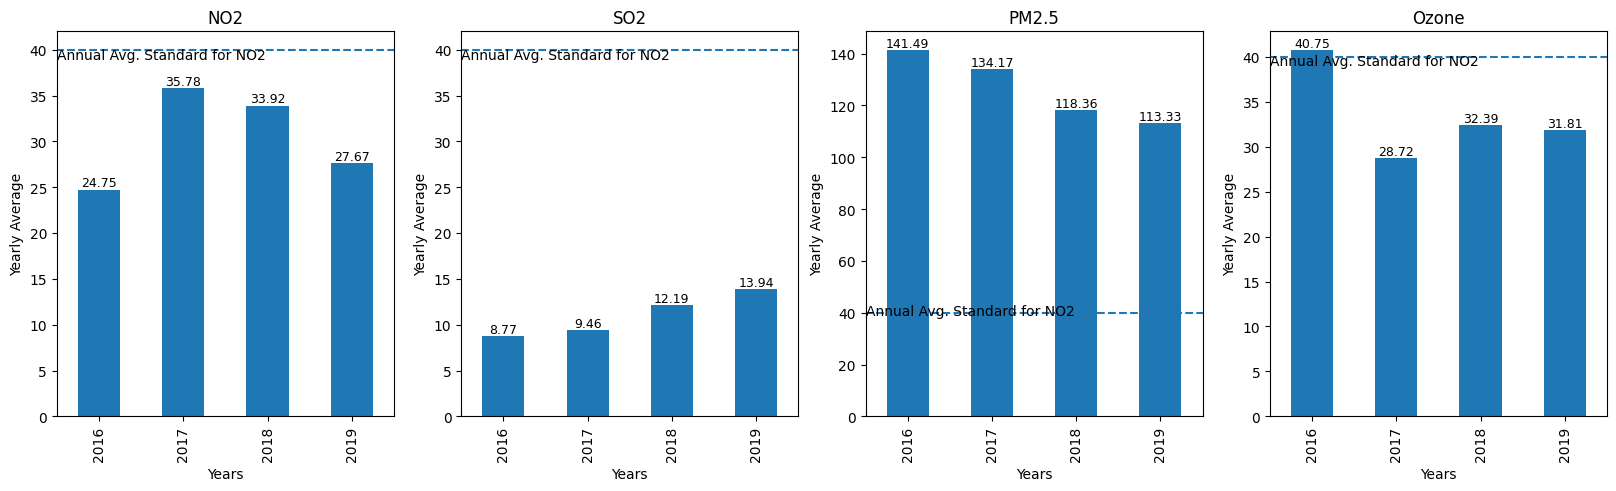

In [19]:
# creating a figure with 4 subplots
fig = plt.figure()

# plot for NO2 ======================================>
ax1 = fig.add_subplot(1,4,1)    # creating the subplot
dfn.plot(kind="bar", ax=ax1, figsize=(20,5))    # plotting the graph
ax1.set_title("NO2")            # setting the plot title
ax1.set_xlabel("Years")         #  setting the x_axis label
ax1.set_ylabel("Yearly Average")    # setting the y_axis label
ax1.legend().set_visible(False)     # hidding the legend associated with the ax1plot  

# creating a dashed line to indicate the annual statndard
ax1.hlines(y=40, xmin=-0.9, xmax=15, linestyles="dashed")
# labelling the dashed line
ax1.annotate("Annual Avg. Standard for NO2", (-0.5, 39))
# Assuming ax1 is the axis you want to plot on
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=9)


# plot for SO2 =========================================>
ax2 = fig.add_subplot(1,4,2)    # creating the subplot
dfs.plot(kind="bar", ax=ax2, figsize=(20,5))    # plotting the graph
ax2.set_title("SO2")            # setting the plot title
ax2.set_xlabel("Years")         #  setting the x_axis label
ax2.set_ylabel("Yearly Average")    # setting the y_axis label
ax2.legend().set_visible(False)     # hidding the legend associated with the ax1plot  

# creating a dashed line to indicate the annual statndard
ax2.hlines(y=40, xmin=-0.9, xmax=15, linestyles="dashed")
# labelling the dashed line
ax2.annotate("Annual Avg. Standard for NO2", (-0.5, 39))
# Assuming ax1 is the axis you want to plot on
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=9)
    

# plot for PM2.5 ======================================>
ax3 = fig.add_subplot(1,4,3)    # creating the subplot
dfp.plot(kind="bar", ax=ax3, figsize=(20,5))    # plotting the graph
ax3.set_title("PM2.5")            # setting the plot title
ax3.set_xlabel("Years")         #  setting the x_axis label
ax3.set_ylabel("Yearly Average")    # setting the y_axis label
ax3.legend().set_visible(False)     # hidding the legend associated with the ax1plot  

# creating a dashed line to indicate the annual statndard
ax3.hlines(y=40, xmin=-0.9, xmax=15, linestyles="dashed")
# labelling the dashed line
ax3.annotate("Annual Avg. Standard for NO2", (-0.5, 39))
# Assuming ax1 is the axis you want to plot on
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=9)


# plot for Ozone ======================================>
ax4 = fig.add_subplot(1,4,4)    # creating the subplot
dfo.plot(kind="bar", ax=ax4, figsize=(20,5))    # plotting the graph
ax4.set_title("Ozone")            # setting the plot title
ax4.set_xlabel("Years")         #  setting the x_axis label
ax4.set_ylabel("Yearly Average")    # setting the y_axis label
ax4.legend().set_visible(False)     # hidding the legend associated with the ax1plot  

# creating a dashed line to indicate the annual statndard
ax4.hlines(y=40, xmin=-0.9, xmax=15, linestyles="dashed")
# labelling the dashed line
ax4.annotate("Annual Avg. Standard for NO2", (-0.5, 39))
# Assuming ax1 is the axis you want to plot on
for p in ax4.patches:
    ax4.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=9)

### Observations
1. The standards for annual average are exceeded only for PM2.5.
2. The observed values for NO2 are relatively close to the prescribed standard
3. The observed values for SO2 are much less than the annual standard

### Conclusion
Only two pollutants (NO2 and PM2.5) are considered

### Part 2 of Analysis
2. **Daily Standards**: For the pollutants of concern on how many days in each year are the daily standards exceeded?

NB: The pollutants are NO2 and PM2.5

``` 
USING PM2.5 pollutant
intervals
a. 0	to	60	μg/m3
===> This range represents PM2.5 concentrations below the WHO's 
annual guideline of 10 µg/m³. It indicates relatively good air 
quality with minimal health concerns.

b. 61	to	120	μg/m3
===> This range covers PM2.5 concentrations above the WHO annual 
guideline but below the 24-hour guideline of 25 µg/m³. It signifies
moderate air quality with potential health impacts for sensitive individuals.

c. 121	to	180	μg/m3
===> This range exceeds both the annual and 24-hour WHO guidelines, 
indicating poor air quality that may pose health risks to the general population.

d. >	180	μg/m3
===> This represents PM2.5 concentrations significantly above the WHO guidelines,
indicating very poor air quality with substantial health risks for the population.
```

In [20]:
# creating intervals for 2016 with the number of days with PM2.5
# concentration falling in that interval
a16 = aq2016[(aq2016['PM2.5'] <= 60)]["PM2.5"].count()
b16 = aq2016[(aq2016['PM2.5'] > 60) & (aq2016['PM2.5'] <= 120)]["PM2.5"].count()
c16 = aq2016[(aq2016['PM2.5'] > 120) & (aq2016['PM2.5'] <= 180)]["PM2.5"].count()
d16 = aq2016[(aq2016['PM2.5'] > 180)]["PM2.5"].count()

dfpb2016 = pd.DataFrame(
    {
        'Year': '2016',
        'PM2.5 Levels': ['less than 60', 'from 61 to 120', 'from 121 to 180', 'greater than 180'],
        'number of critical days': [a16, b16, c16, d16]
    }
    )


# creating intervals for 2017 with the number of days with PM2.5
# concentration falling in that interval
a17 = aq2017[(aq2017['PM2.5'] <= 60)]["PM2.5"].count()
b17 = aq2017[(aq2017['PM2.5'] > 60) & (aq2017['PM2.5'] <= 120)]["PM2.5"].count()
c17 = aq2017[(aq2017['PM2.5'] > 120) & (aq2017['PM2.5'] <= 180)]["PM2.5"].count()
d17 = aq2017[(aq2017['PM2.5'] > 180)]["PM2.5"].count()

dfpb2017 = pd.DataFrame(
    {
        'Year': '2017',
        'PM2.5 Levels': ['less than 60', 'from 61 to 120', 'from 121 to 180', 'greater than 180'],
        'number of critical days': [a17, b17, c17, d17]
    }
    )


# creating intervals for 2018 with the number of days with PM2.5
# concentration falling in that interval
a18 = aq2018[(aq2018['PM2.5'] <= 60)]["PM2.5"].count()
b18 = aq2018[(aq2018['PM2.5'] > 60) & (aq2018['PM2.5'] <= 120)]["PM2.5"].count()
c18 = aq2018[(aq2018['PM2.5'] > 120) & (aq2018['PM2.5'] <= 180)]["PM2.5"].count()
d18 = aq2018[(aq2018['PM2.5'] > 180)]["PM2.5"].count()

dfpb2018 = pd.DataFrame(
    {
        'Year': '2018',
        'PM2.5 Levels': ['less than 60', 'from 61 to 120', 'from 121 to 180', 'greater than 180'],
        'number of critical days': [a18, b18, c18, d18]
    }
    )


# creating intervals for 2019 with the number of days with PM2.5
# concentration falling in that interval
a19 = aq2019[(aq2019['PM2.5'] <= 60)]["PM2.5"].count()
b19 = aq2019[(aq2019['PM2.5'] > 60) & (aq2019['PM2.5'] <= 120)]["PM2.5"].count()
c19 = aq2019[(aq2019['PM2.5'] > 120) & (aq2019['PM2.5'] <= 180)]["PM2.5"].count()
d19 = aq2019[(aq2019['PM2.5'] > 180)]["PM2.5"].count()

dfpb2019 = pd.DataFrame(
    {
        'Year': '2019',
        'PM2.5 Levels': ['less than 60', 'from 61 to 120', 'from 121 to 180', 'greater than 180'],
        'number of critical days': [a19, b19, c19, d19]
    }
    )

In [21]:
# plotting a stack bar chart for each year
# creating pivot tables
dfpivot2016 = dfpb2016.pivot(index="Year", columns="PM2.5 Levels", values="number of critical days")
dfpivot2017 = dfpb2017.pivot(index="Year", columns="PM2.5 Levels", values="number of critical days")
dfpivot2018 = dfpb2018.pivot(index="Year", columns="PM2.5 Levels", values="number of critical days")
dfpivot2019 = dfpb2019.pivot(index="Year", columns="PM2.5 Levels", values="number of critical days")

Text(0.5, 1.0, '2019')

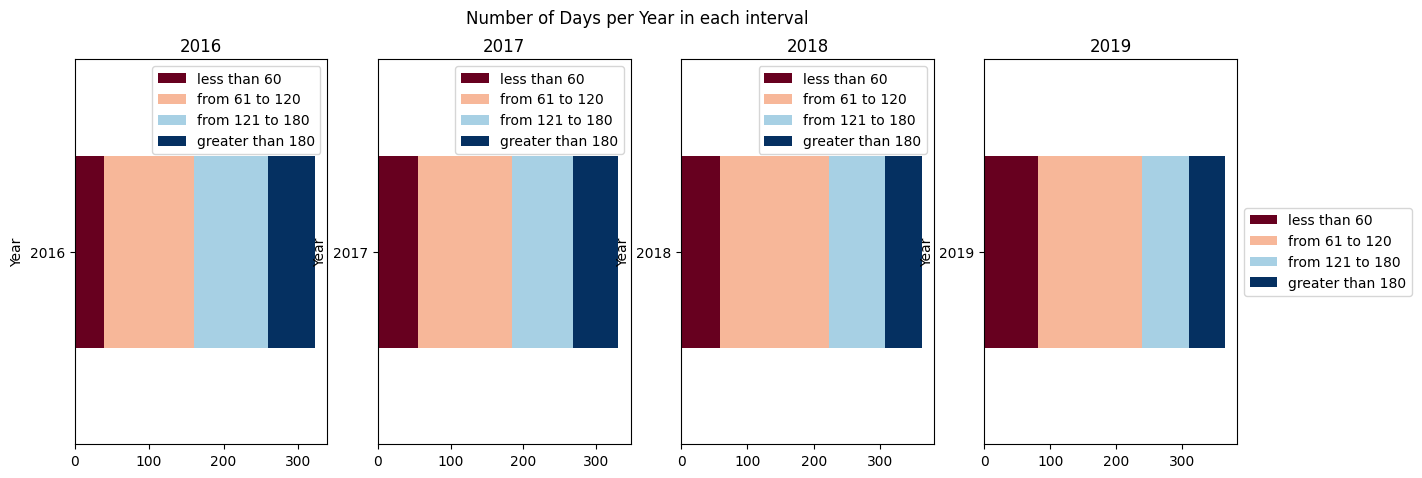

In [22]:
# creating the stack bar with the pivot tables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.suptitle("Number of Days per Year in each interval")
cmp = plt.colormaps.get_cmap('RdBu')       # don't use double quotes

# plotting stack horizontal bar charts for each yearto represent intervals of PM2.5 levels
dfpivot2016.loc[:, ['less than 60', 'from 61 to 120', 'from 121 to 180', 'greater than 180']].plot(
    kind="barh", stacked="True", cmap=cmp, figsize=(15,5), ax = ax1
)
dfpivot2017.loc[:, ['less than 60', 'from 61 to 120', 'from 121 to 180', 'greater than 180']].plot(
    kind="barh", stacked="True", cmap=cmp, figsize=(15,5), ax = ax2
)
dfpivot2018.loc[:, ['less than 60', 'from 61 to 120', 'from 121 to 180', 'greater than 180']].plot(
    kind="barh", stacked="True", cmap=cmp, figsize=(15,5), ax = ax3
)
dfpivot2019.loc[:, ['less than 60', 'from 61 to 120', 'from 121 to 180', 'greater than 180']].plot(
    kind="barh", stacked="True", cmap=cmp, figsize=(15,5), ax = ax4
)

# setting properties of the chart ---> legend, y_axis and title
ax1.legend().set_visible("False")
ax2.legend().set_visible("False")
ax3.legend().set_visible("False")
ax4.legend(loc="center left", bbox_to_anchor=(1, 0.5))

ax1.get_yaxis().set_visible("False")
ax2.get_yaxis().set_visible("False")
ax3.get_yaxis().set_visible("False")
ax4.get_yaxis().set_visible("False")

ax1.set_title("2016")
ax2.set_title("2017")
ax3.set_title("2018")
ax4.set_title("2019")



### Observation:
* It is seen that PM2.5 values above 180ug/m^3 are observed every year.
* Therefore restrictions on major polluting activities, including traffic, could be confined to this category.

```
USING NO2
Likewise, for NO2, the number of days in	each year on which
monitored values exceed	the 24-hourly standards	of 80 μg/m3 is plotted
```

NB: The statndard threshoold for NO2 is 80 μg/m3

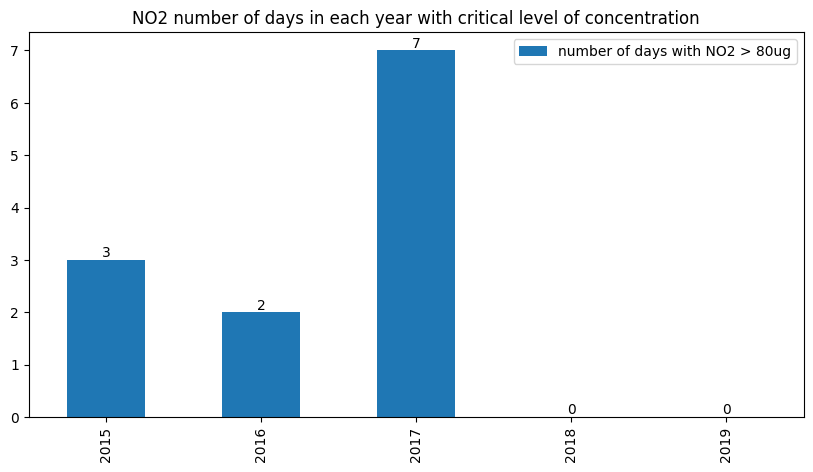

In [27]:
# calculating the number of days in each year with regard to critical
# days of NO2 concentration
a =  aq2015[(aq2015["NO2"] >= 80)]["NO2"].count()
b =  aq2016[(aq2016["NO2"] >= 80)]["NO2"].count()
c =  aq2017[(aq2017["NO2"] >= 80)]["NO2"].count()
d =  aq2018[(aq2018["NO2"] >= 80)]["NO2"].count()
e =  aq2019[(aq2019["NO2"] >= 80)]["NO2"].count()

# creating a dataframe that captures the no. of days in each year with values
# higher than 80ug/m^3
dfno = pd.DataFrame(
    {
        'Years':['2015', '2016', '2017', '2018', '2019'],
        'number of days with NO2 > 80ug': [a,b,c,d,e]
    }
) 

# ploting bar chart
ax = dfno.plot(kind="bar", figsize=(10,5))
ax.set_xticklabels(['2015', '2016', '2017', '2018', '2019'])
ax.set_title("NO2 number of days in each year with critical level of concentration")

for p in ax.patches:
    ax.annotate(
        p.get_height(),         # annotates each bar with its height
        (p.get_x() + p.get_width()/2, p.get_height()),      #the specified position.
        ha="center", va="bottom"
        )

### Observation:
1. The 24-hourly NO2 values are exceeded only for three of the five years(2015, 2016, 2017, 2018, 2019)
2. Since observed 24-hourly NO2 values exceed standard only marginally and that too only for a few days 

### Part 3 of Analysis:
3. **Temporal Variation**: Which are the months where the pollution levels exceed critical levels on most days?

```
Before imposing restrictions on activities like vehicular traffic and construction, which significantly contribute to ambient PM2.5
concetrations, it is necessary to provide sufficient notice to avoid inconvenience to the general public.
```

In [37]:
# creating dataframes for each year with the number of days in each 
# month were PM2.5 values exceed 180ug/m^3

# 2016 ========================>
# extracting the month
aq2016.loc[:,'Month'] = pd.DatetimeIndex(aq2016['From Date']).month
# creating boolean column that is True when PM2.5 value is greater than 180
aq2016.loc[:,"Condition"] = (aq2016['PM2.5'] >= 180)
# replacing the false values with null
aq2016.loc[:,"Condition"] = aq2016["Condition"].replace({False:np.nan})
# calculating the number of days for each month that satisfies the condition (PM2.5>180)
selection_2016 = aq2016.groupby('Month')['Condition'].count()


# 2017 =========================>
# extracting the month
aq2017.loc[:,'Month'] = pd.DatetimeIndex(aq2017['From Date']).month
# creating boolean column that is True when PM2.5 value is greater than 180
aq2017.loc[:,"Condition"] = (aq2017['PM2.5'] >= 180)
# replacing the false values with null
aq2017.loc[:,"Condition"] = aq2017["Condition"].replace({False:np.nan})
# calculating the number of days for each month that satisfies the condition (PM2.5>180)
selection_2017 = aq2017.groupby('Month')['Condition'].count()


# 2018 =========================>
# extracting the month
aq2018.loc[:,'Month'] = pd.DatetimeIndex(aq2018['From Date']).month
# creating boolean column that is True when PM2.5 value is greater than 180
aq2018.loc[:,"Condition"] = (aq2018['PM2.5'] >= 180)
# replacing the false values with null
aq2018.loc[:,"Condition"] = aq2018["Condition"].replace({False:np.nan})
# calculating the number of days for each month that satisfies the condition (PM2.5>180)
selection_2018 = aq2018.groupby('Month')['Condition'].count()

# 2019 =========================>
# extracting the month
aq2019.loc[:,'Month'] = pd.DatetimeIndex(aq2019['From Date']).month
# creating boolean column that is True when PM2.5 value is greater than 180
aq2019.loc[:,"Condition"] = (aq2019['PM2.5'] >= 180)
# replacing the false values with null
aq2019.loc[:,"Condition"] = aq2019["Condition"].replace({False:np.nan})
# calculating the number of days for each month that satisfies the condition (PM2.5>180)
selection_2019 = aq2019.groupby('Month')['Condition'].count()

In [38]:
# concatenating all the above dataframes into one object
# to get a consolidated picture of the number of days in each month
selections = pd.DataFrame(
    {
        "2016": selection_2016,
        "2017": selection_2017,
        "2018": selection_2018,
        "2019": selection_2019
    }
)

selections

,2016,2017,2018,2019
Month,,,,
1,20,3,23,14
2,3,0,5,3
3,1,7,0,0
4,3,1,0,1
5,3,1,0,2
6,7,5,4,1
7,2,0,0,0
8,0,0,0,0
9,2,0,0,0


### Inference:
Month 1 (January), Month 11 (November) and month 12 (December) are the most critical months for all the four years as these months had the highest number of days with PM2.5 > 180ug/m^3 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5720\3051711248.py:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax.legend(patterns, ["2016", "2017", "2018", "2019"])


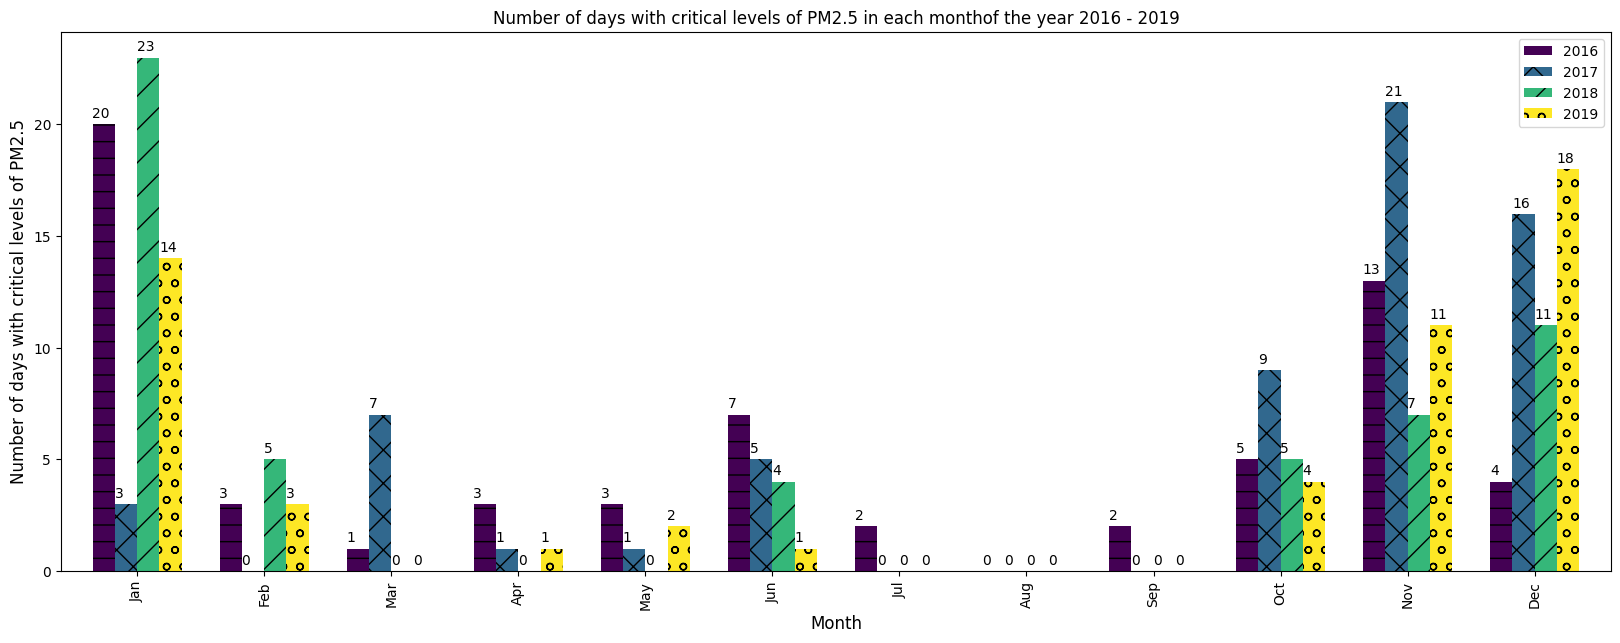

In [64]:
# Visualizing the above inference using bar chart
ax = selections.plot(kind="bar", figsize=(20,7), width=0.7, align="center", colormap= 'viridis')
bars = ax.patches

# craeting partterns to represent each year
patterns = ["-", "x", "/", "o"]
ax.legend(patterns, ["2016", "2017", "2018", "2019"])
hatches = [p for p in patterns for i in range(len(selections))]
# setting a parttern for each bar
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# labelling the months, x_axis and y_axis
ax.set_xticklabels(["Jan","Feb", "Mar", "Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Number of days with critical levels of PM2.5", fontsize=12)

# labelling the bars
for bar in bars:
    ax.text(
        bar.get_x() - 0.003,
        bar.get_height() + 0.3,
        round(bar.get_height(), 2),
        fontsize=10,
        color="black"
    )

ax.legend()
ax.set_title("Number of days with critical levels of PM2.5 in each monthof the year 2016 - 2019")

plt.show()

### Observation:
1. Most of the polluted days fall in January, November and December.

### Conclusion:
Based on the daily average concentrations of PM2.5 recorded over the past four years, restrictions on vehicular traffic, construction activities are likely to be imposed in January, November and December.